In [17]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', None)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


import re 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from dmba import plotDecisionTree, classificationSummary, regressionSummary
import joblib
from nltk.tokenize import RegexpTokenizer
import nltk
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, plot_confusion_matrix 
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score

from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin

import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

import sklearn
print(sklearn.__version__)




1.0.2


In [18]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [19]:

import nltk
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words("english"))
default_stemmer = PorterStemmer()
default_stopwords = stopwords.words('english')
default_tokenizer=RegexpTokenizer(r"\w+")
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pallavinair/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pallavinair/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pallavinair/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/pallavinair/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/pallavinair/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [20]:
pip install --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.


In [21]:

fj_df = pd.read_csv('fakejobpostings.csv')

In [22]:
fj_df.head()


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [23]:
fj_df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [24]:
fj_df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
fj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [26]:
fj_df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [27]:
#check null. Most salary ranges contain null values. As most companies may only reveal it in the packages.
null_values = fj_df.isnull().sum()
plt.figure(figsize = (25,15))
sns.barplot(null_values.index, null_values, color = 'orange')
sns.set_style("white")
# plt.suptitle('Missing values in the dataset', size = 20)
plt.ylabel('Missing values count', size = 30)
plt.xticks(rotation = '45', fontsize=23)
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 2500x1500 with 0 Axes>

In [28]:
#Check unique values
categorical_columns = []
for col in fj_df.columns:
    print(f'Unique observations in {col}:', fj_df[col].nunique())
    if fj_df[col].nunique() < 14:
        categorical_columns.append(col)
print('Categorical columns:',categorical_columns)

Unique observations in job_id: 17880
Unique observations in title: 11231
Unique observations in location: 3105
Unique observations in department: 1337
Unique observations in salary_range: 874
Unique observations in company_profile: 1709
Unique observations in description: 14801
Unique observations in requirements: 11968
Unique observations in benefits: 6205
Unique observations in telecommuting: 2
Unique observations in has_company_logo: 2
Unique observations in has_questions: 2
Unique observations in employment_type: 5
Unique observations in required_experience: 7
Unique observations in required_education: 13
Unique observations in industry: 131
Unique observations in function: 37
Unique observations in fraudulent: 2
Categorical columns: ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'fraudulent']


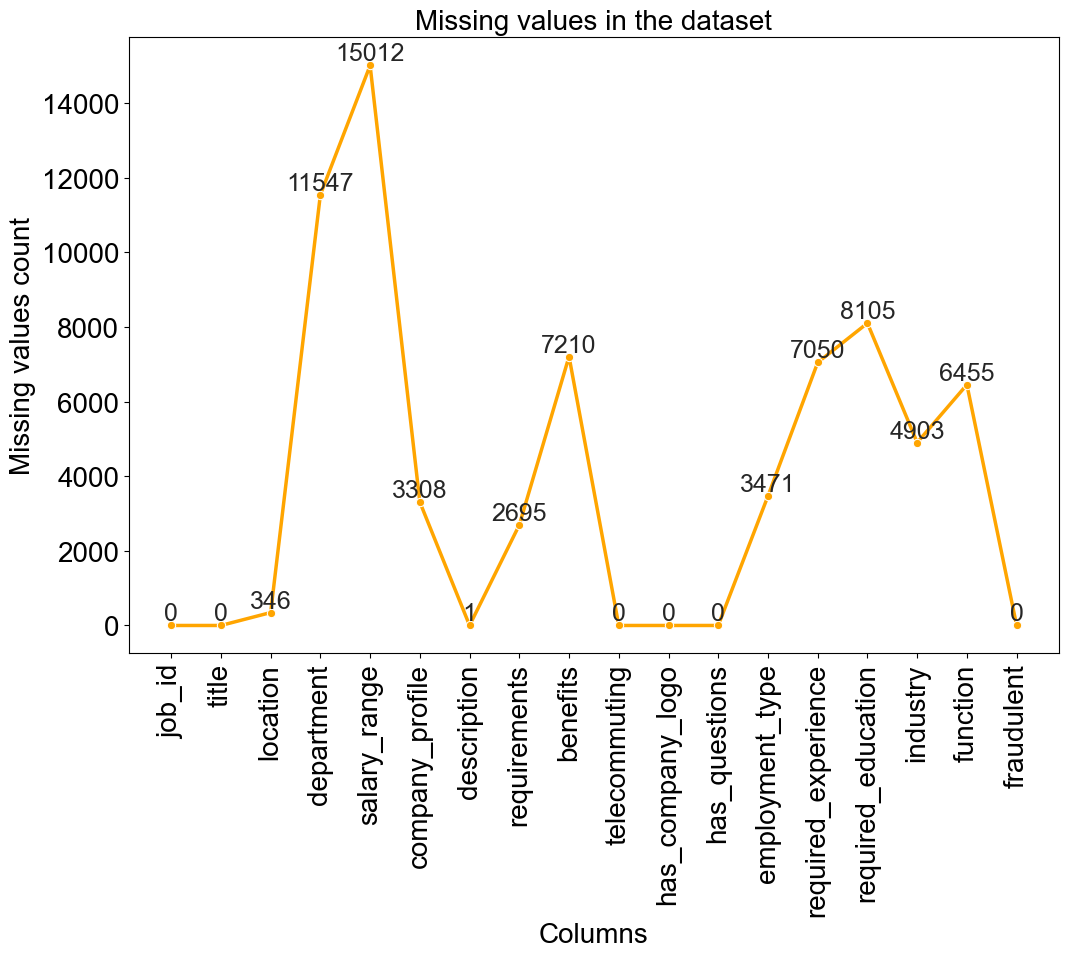

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

null_values = fj_df.isnull().sum()

plt.figure(figsize=(12, 8))
sns.lineplot(x=null_values.index, y=null_values, color='orange', linewidth=2.5, marker='o')  # Set marker='o' to show dots
sns.set_style("white")  # Set the style to "white" to remove grid lines

# Display the values in the chart
for x, y in zip(null_values.index, null_values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=18)

plt.title('Missing values in the dataset', size=20)
plt.xlabel('Columns', size=20)
plt.ylabel('Missing values count', size=20)
plt.xticks(rotation='90', fontsize=20)
plt.yticks(fontsize=20)
plt.show()

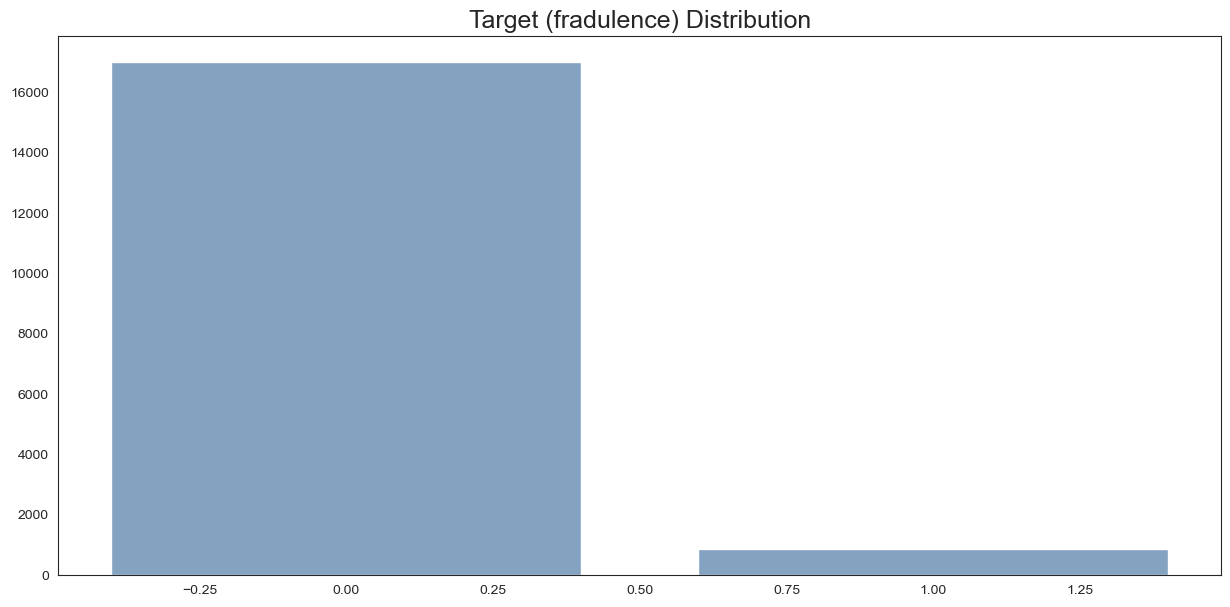

In [30]:
#Check target value
figure = plt.figure(figsize = (15,7))
target_dist = fj_df['fraudulent'].value_counts()
plt.bar(target_dist.index, target_dist, color=(0.2, 0.4, 0.6, 0.6))
plt.title('Target (fradulence) Distribution', size = 18)
plt.show()

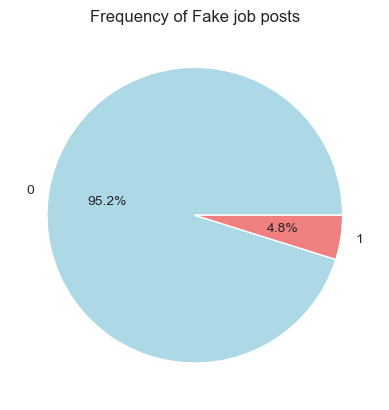

In [31]:
import matplotlib.pyplot as plt

# Get the frequency of each value in the Isabadbuy column
is_fake_job_counts = fj_df['fraudulent'].value_counts()

# Create a pie chart
plt.pie(is_fake_job_counts, labels=is_fake_job_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])

# Set the chart title
plt.title('Frequency of Fake job posts')

# Display the chart
plt.show()

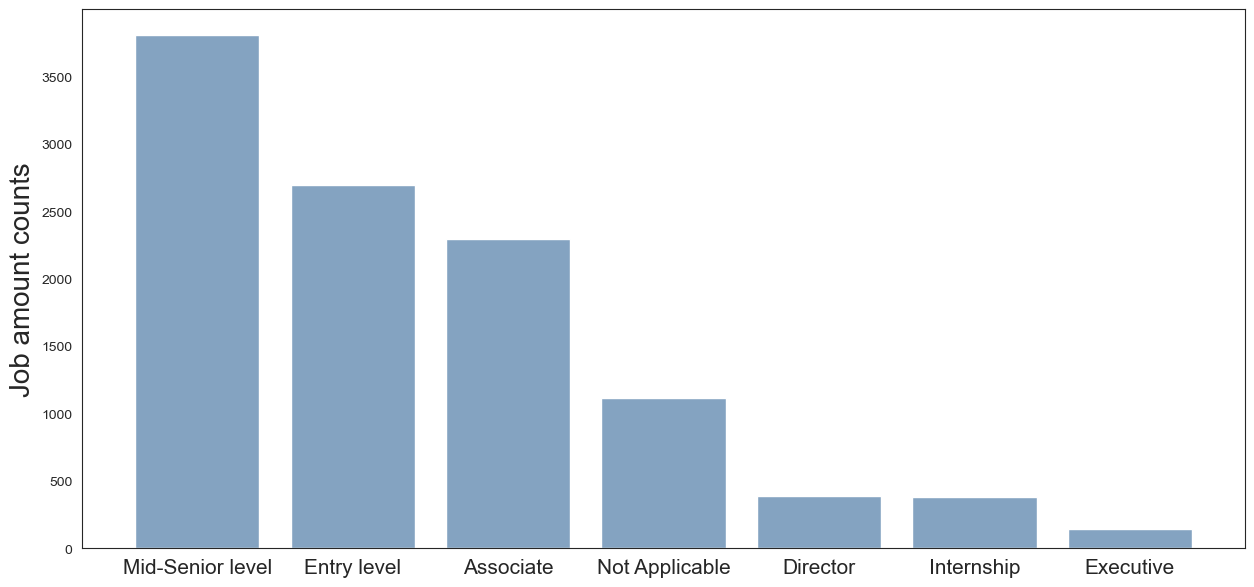

In [32]:
#Check required experience and related job posts amounts
experience = dict(fj_df.required_experience.value_counts())
figure = plt.figure(figsize = (15,7))
plt.bar(experience.keys(), experience.values(),color=(0.2, 0.4, 0.6, 0.6))
# plt.title('Number of job postings in different required experience', size=20)
# plt.xlabel('Previous experience', size=10)
plt.ylabel('Job amount counts', size=20)
plt.xticks(size=15)
plt.show()

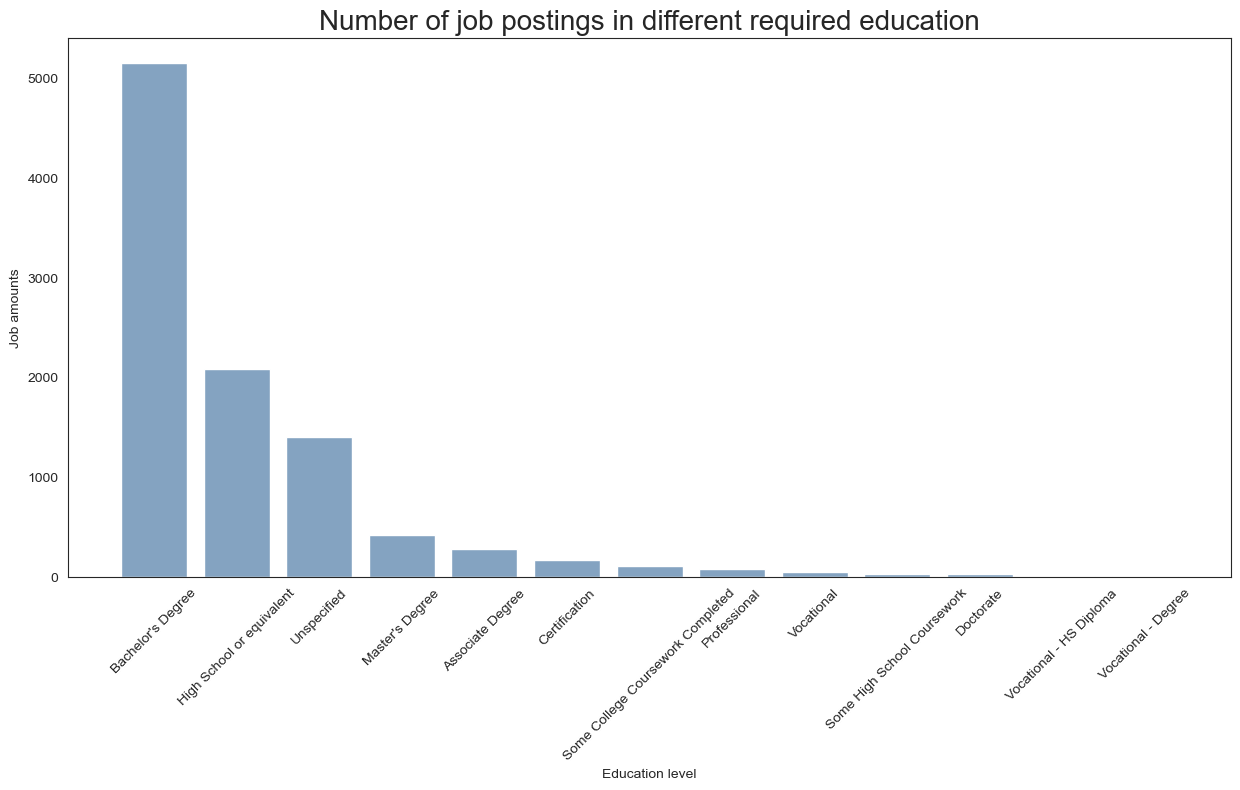

In [33]:
#Check required education and related job posts amounts
experience = dict(fj_df.required_education.value_counts())
figure = plt.figure(figsize = (15,7))
plt.bar(experience.keys(), experience.values(),color=(0.2, 0.4, 0.6, 0.6))
plt.title('Number of job postings in different required education', size=20)
plt.xlabel('Education level', size=10)
plt.ylabel('Job amounts', size=10)
plt.xticks(rotation=45)
plt.show()

In [34]:
#fill NA values with empty strings
fj_df.location = fj_df.location.fillna('blank')

In [37]:
fj_df_US = fj_df[fj_df['location'].str.contains("US")]

In [38]:
loc_split =[]
for loc in fj_df_US.location:
    loc_split.append(loc.split(','))

loc_split = pd.DataFrame(loc_split)

loc_split = loc_split[[1, 2]]

loc_split = loc_split.rename(columns={1: "state", 2:'city'})

In [39]:
len(fj_df_US)/len(fj_df)

0.5959731543624162

In [40]:
fj_df_US = fj_df_US.reset_index()

In [41]:
fj_df_US = fj_df_US.join(loc_split)

In [42]:
fj_df_US = fj_df_US[['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'state', 'city']]

In [43]:
fj_df_US = fj_df_US[fj_df_US['city'].notna()]
fj_df_US = fj_df_US[fj_df_US['state'].notna()]

In [44]:
fj_df_US.shape

(10593, 20)

In [45]:
fj_df_US['state_city'] = fj_df_US['state'] + ", " + fj_df_US['city']

In [46]:
fj_df_US.isna().sum()

job_id                    0
title                     0
location                  0
department             7567
salary_range           9064
company_profile        2037
description               0
requirements           1744
benefits               4638
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        1754
required_experience    4267
required_education     4460
industry               2672
function               3889
fraudulent                0
state                     0
city                      0
state_city                0
dtype: int64

In [47]:
fj_df_US.city = fj_df_US.city.str.strip()
fj_df_US.state = fj_df_US.state.str.strip()

In [48]:
fj_df_US.fillna(" ",inplace = True)

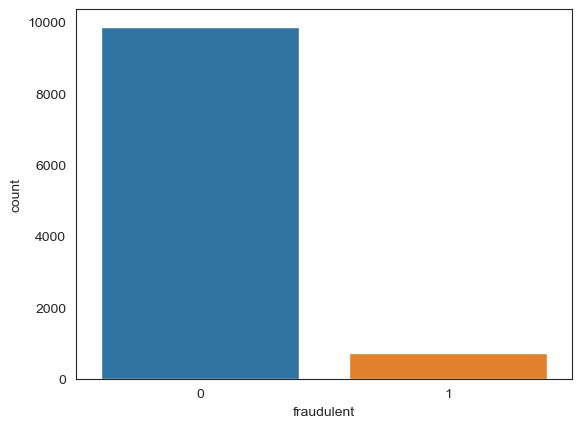

In [51]:

sns.countplot(x='fraudulent', data=fj_df_US)
sns.set_style("white")  # Set the style to "white" to remove grid lines


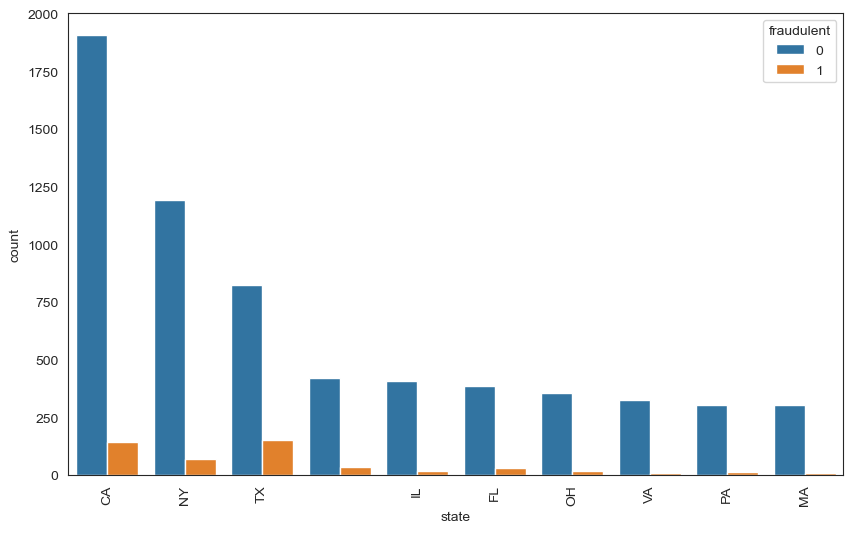

In [55]:
filtered_df = fj_df_US[fj_df_US['state'] .notnull()]
plt.figure(figsize=(10,6))
sns.countplot(x='state', data=filtered_df , hue="fraudulent", order=filtered_df ['state'].value_counts().iloc[0:10].index)
plt.xticks(rotation=90)

plt.show()

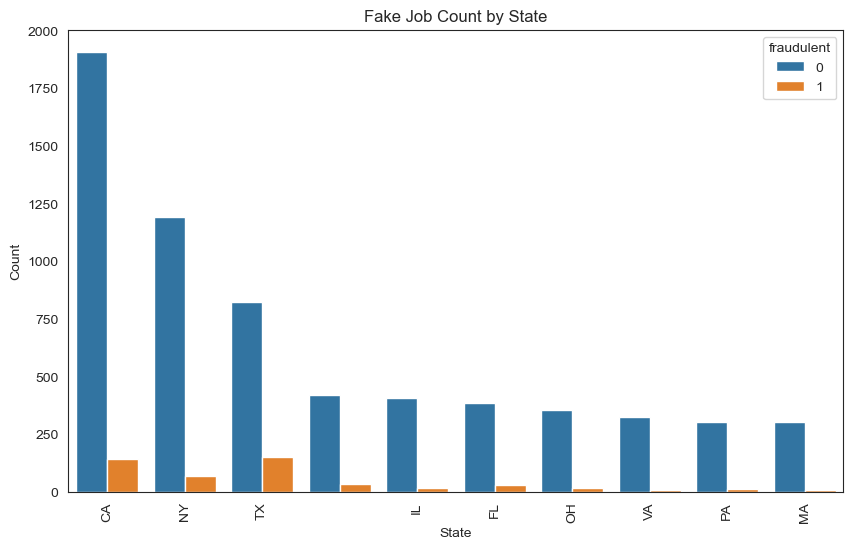

In [56]:

# Filter the dataset to exclude the states with blank values
filtered_df = fj_df_US[fj_df_US['state'].notnull()]

plt.figure(figsize=(10, 6))
sns.countplot(x='state', data=filtered_df, hue="fraudulent", order=filtered_df['state'].value_counts().iloc[0:10].index)
plt.xticks(rotation=90)
plt.title('Fake Job Count by State')
plt.xlabel('State')
plt.ylabel('Count')

plt.show()

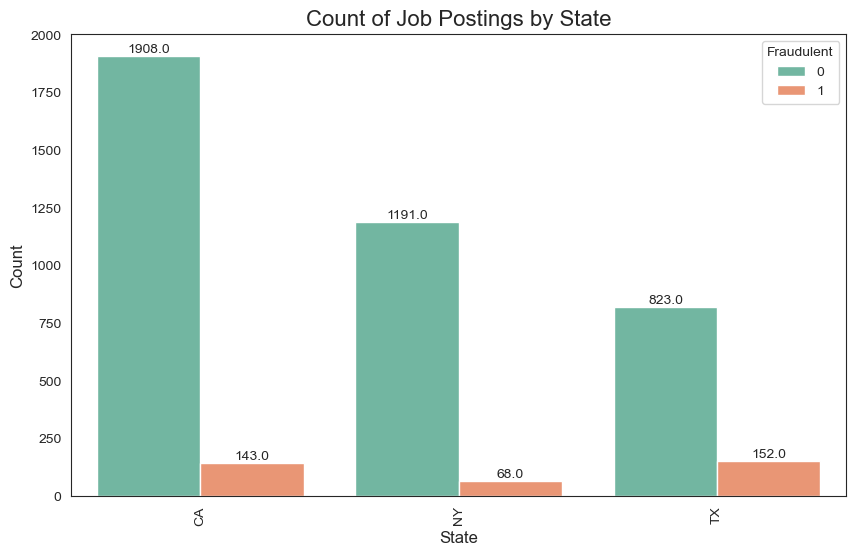

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_df = fj_df_US.dropna(subset=['state'])

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='state', data=filtered_df, hue='fraudulent', order=filtered_df['state'].value_counts().iloc[0:3].index, palette='Set2')

# Add values to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height, height, ha='center', va='bottom')

plt.xticks(rotation=90)
plt.title('Count of Job Postings by State', size=16)
plt.xlabel('State', size=12)
plt.ylabel('Count', size=12)
plt.legend(title='Fraudulent')
plt.show()

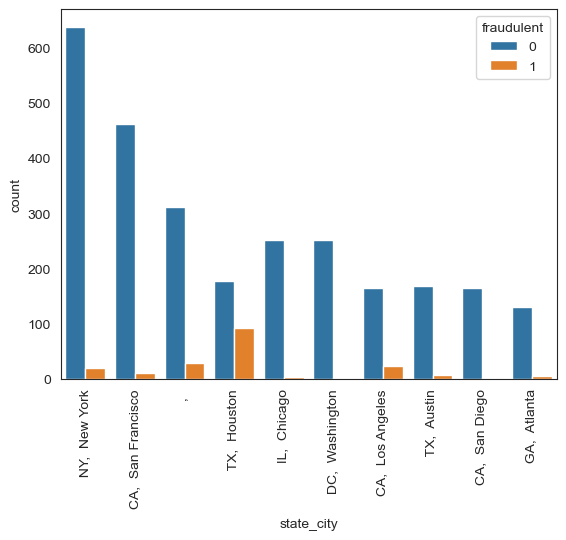

In [58]:
sns.countplot(x='state_city', data=fj_df_US, hue="fraudulent", order=fj_df_US['state_city'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

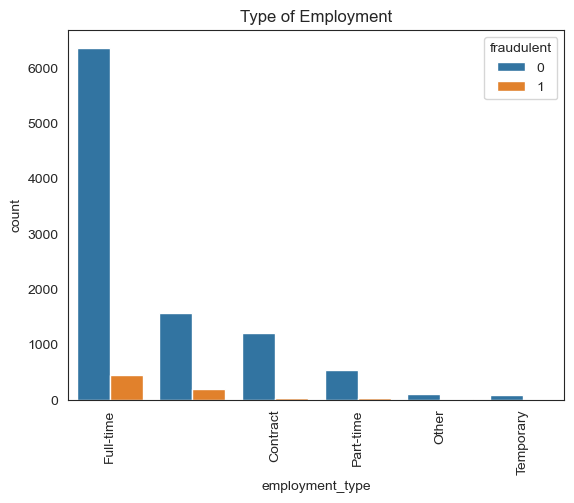

In [59]:
def sns_countplot(feature):
    sns.countplot(x=feature, data=fj_df_US, hue="fraudulent",
              order=fj_df_US[feature].value_counts().iloc[:10].index)
    plt.xticks(rotation=90)
    plt.title('Type of Employment')
    plt.show()
sns_countplot('employment_type');

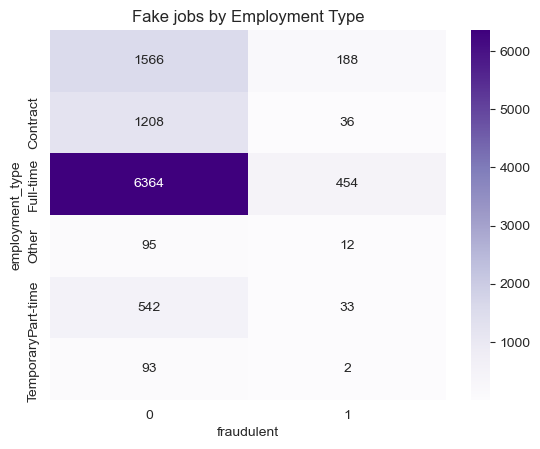

In [60]:
grouped = fj_df_US.groupby(['employment_type', 'fraudulent']).size().reset_index(name='Count')

# Pivot the data to create a heatmap
heatmap_data = grouped.pivot('employment_type', 'fraudulent', 'Count')

# Create the heatmap using seaborn
ax = sns.heatmap(heatmap_data, cmap='Purples', annot=True, fmt='g')

# Add a title to the heatmap
ax.set_title('Fake jobs by Employment Type')

# Show the heatmap
plt.show()

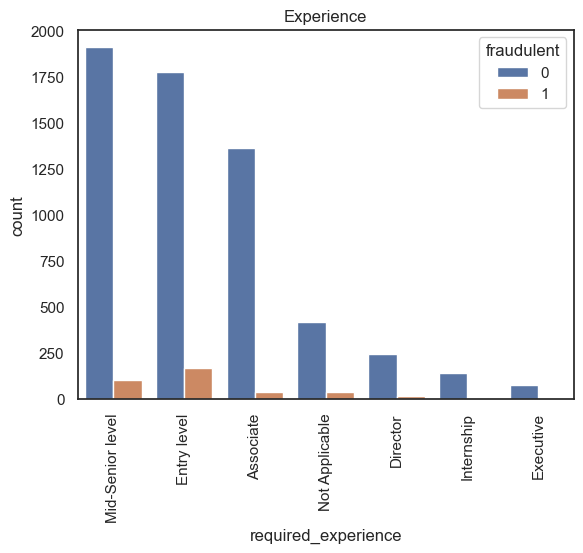

In [281]:
def sns_countplot(feature):
    sns.countplot(x=feature, data=fj_df_US, hue="fraudulent",
              order=fj_df_US[feature].value_counts().iloc[:10].index)
    plt.xticks(rotation=90)
    plt.title('Experience')
    plt.show()
sns_countplot('required_experience');

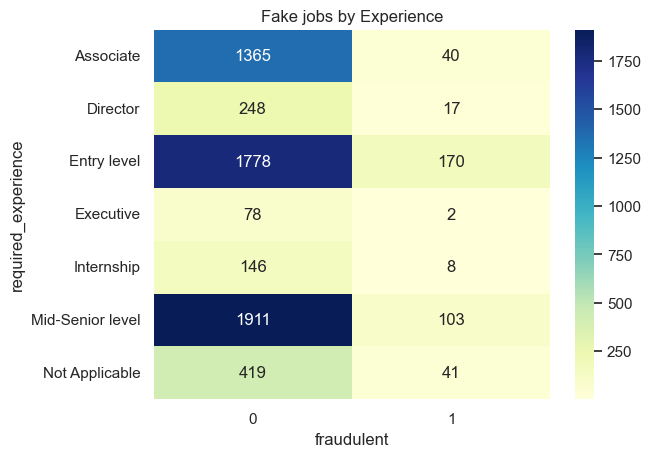

In [375]:
grouped = fj_df_US.groupby(['required_experience', 'fraudulent']).size().reset_index(name='Count')

# Pivot the data to create a heatmap
heatmap_data = grouped.pivot('required_experience', 'fraudulent', 'Count')

# Create the heatmap using seaborn
ax = sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g')

# Add a title to the heatmap
ax.set_title('Fake jobs by Experience')

# Show the heatmap
plt.show()

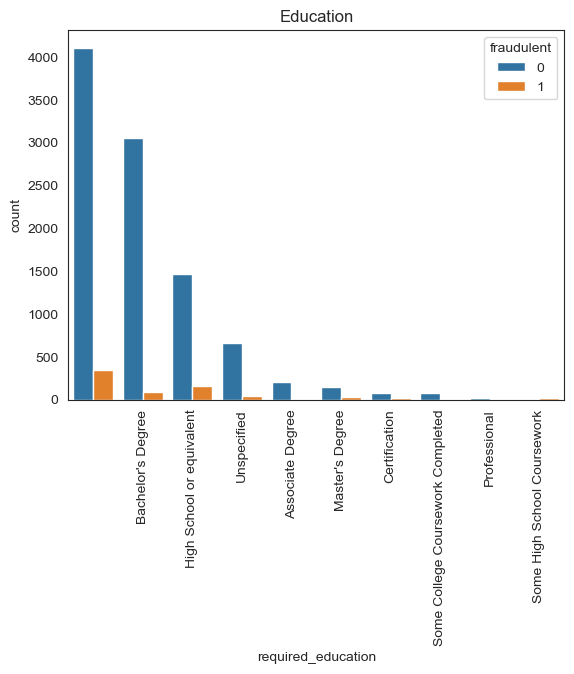

In [61]:
def sns_countplot(feature):
    sns.countplot(x=feature, data=fj_df_US, hue="fraudulent",
              order=fj_df_US[feature].value_counts().iloc[:10].index)
    plt.xticks(rotation=90)
    plt.title('Education')
    plt.show()
sns_countplot('required_education');

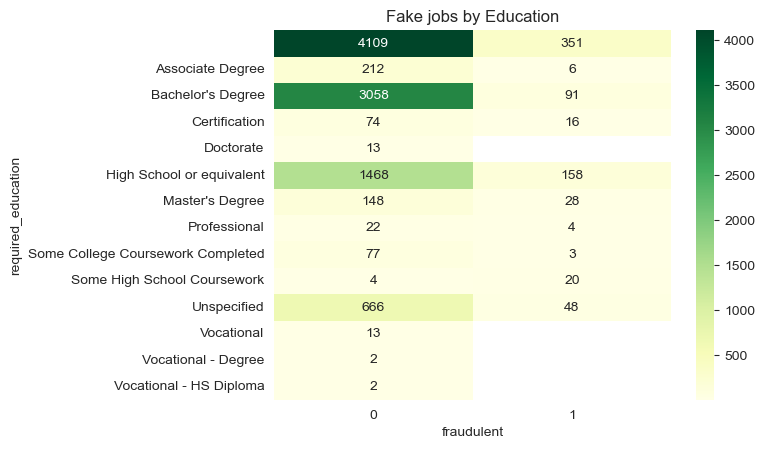

In [66]:
grouped = fj_df_US.groupby(['required_education', 'fraudulent']).size().reset_index(name='Count')

# Pivot the data to create a heatmap
heatmap_data = grouped.pivot('required_education', 'fraudulent', 'Count')

# Create the heatmap using seaborn
ax = sns.heatmap(heatmap_data, cmap='YlGn', annot=True, fmt='g')

# Add a title to the heatmap
ax.set_title('Fake jobs by Education')

# Show the heatmap
plt.show()

In [148]:
location_ratio = round(fj_df_US[fj_df_US.fraudulent == 1].groupby('state_city').state_city.count()
                       /fj_df_US[fj_df_US.fraudulent == 0].groupby('state_city').state_city.count(), 2)
location_ratio = pd.DataFrame({'state_city':location_ratio.index, 'ratio':location_ratio.values})
fj_df_US = fj_df_US.merge(location_ratio)
fj_df_US.ratio.fillna(0, inplace=True)
location_ratio_plot = location_ratio[location_ratio.ratio >= 1]

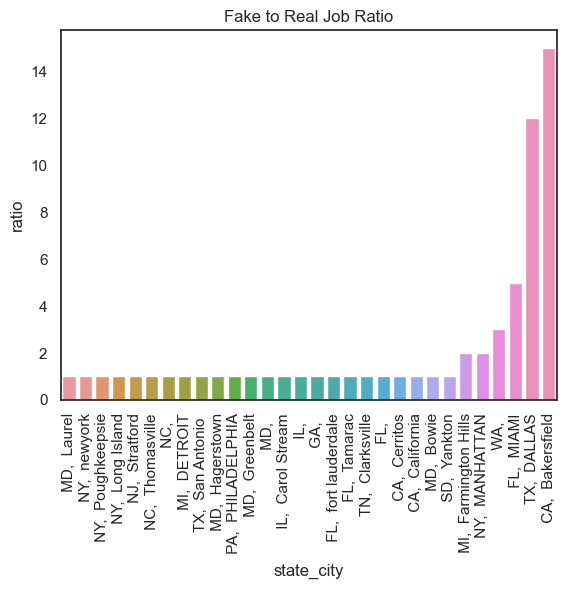

In [149]:
sns.barplot(data=location_ratio_plot.sort_values(by='ratio'), x='state_city', y='ratio')
plt.xticks(rotation=90)
plt.title('Fake to Real Job Ratio')
plt.show()

In [259]:
###Analysing the textual data

fj_df_US['text'] =  fj_df_US['title'] + ' ' + fj_df_US['location'] + ' ' + fj_df_US['company_profile'] + ' ' + \
       fj_df_US['description'] + ' ' + fj_df_US['requirements'] + ' ' + fj_df_US['benefits'] + ' ' + \
        fj_df_US['required_experience'] + ' ' + fj_df_US['required_education'] + ' ' + fj_df_US['industry'] + ' ' + fj_df_US['function']


fj_df_US.drop(['job_id', 'department', 'salary_range', 'title','location','department','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function', 'city', 'state_city', 'has_company_logo', 'has_questions', 'state'], axis = 1, inplace = True)
fj_df_US

,telecommuting,fraudulent,ratio,text
0,0,0,0.03,"Marketing Intern US, NY, New York We're Food52..."
1,0,0,0.03,"Visual Designer US, NY, New York Kettle is an ..."
2,0,0,0.03,"Payroll Tax Specialist US, NY, New York Namely..."
3,0,0,0.03,"Marketing Manager US, NY, New York Super Socce..."
4,0,0,0.03,"English Teacher Abroad US, NY, New York We hel..."
...,...,...,...,...
10588,1,1,0.00,"Military Benefits Counselor US, , chicago Anth..."
10589,0,0,0.00,Sr.Business Intelligence Technical Architect U...
10590,0,0,0.00,Licensed Practical Nurse (LPN)- Private Duty U...
10591,0,0,0.00,"SAS Grid Developer US, NJ, Berkeley Heights ..."


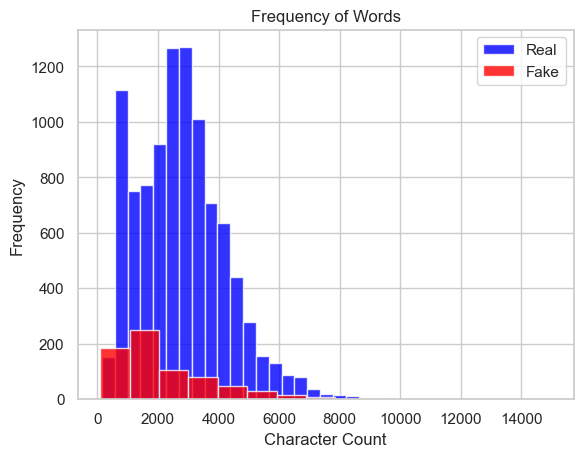

In [260]:
fj_df_US['character_count'] = fj_df_US.text.apply(len)

fj_df_US[fj_df_US.fraudulent==0].character_count.plot(bins=35, kind='hist', color='blue', 
                                       label='Real', alpha=0.8)
fj_df_US[fj_df_US.fraudulent==1].character_count.plot(kind='hist', color='red', 
                                       label='Fake', alpha=0.8)
plt.legend()
plt.title('Frequency of Words')
plt.xlabel("Character Count");

In [2]:
from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt

import dmba

from pathlib import Path # to interact with file system.


import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import seaborn as sns # Making statistical graphs on top of what matplot can do 
import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).
import matplotlib as mpl
from sklearn.model_selection import train_test_split # for data partition.
from sklearn.metrics import r2_score # to identify r_squared for regression model.
from sklearn.linear_model import LinearRegression # for linear regression model.
import os
import calendar
from pathlib import Path # to interact with file system.
import networkx as nx
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns # Making statistical graphs on top of what matplot can do 
from sklearn import preprocessing
import matplotlib.pylab as plt # %matplotlib inline renders the figure in a notebook
%matplotlib inline


In [3]:

import os
print(os.listdir()) 
os.chdir('C:/Users/priya/OneDrive/Desktop/Spring 23/BAN 620 Data Mining/Project/Data set selection')
job_df = pd.read_csv('fake_job_postings.csv')

['exchange_rate_to_usd.csv', 'exchange_rate_usd_to.csv', 'fake_job_postings.csv', 'heart.csv', 'layoffs.csv', 'o2Saturation.csv', 'Placement_Data_Full_Class.csv']


In [4]:
job_df = job_df.drop(['job_id'], axis=1)

In [5]:
job_df = job_df.drop(['salary_range'], axis=1)
#since salary range had 82% missing values, drooped this variable

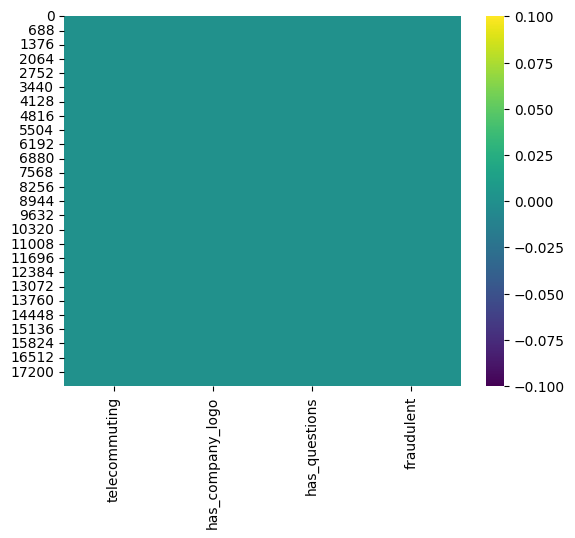

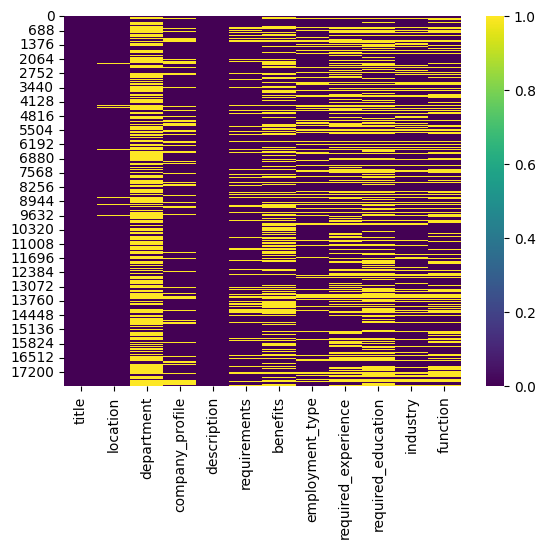

In [6]:
# Select all numerical and categorical columns
num_cols = job_df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = job_df.select_dtypes(include=['object']).columns

# Create a heatmap of missing values using Seaborn for numerical columns
sns.heatmap(job_df[num_cols].isnull(), cmap='viridis')

# Show the heatmap for numerical columns
plt.show()

# Create a heatmap of missing values using Seaborn for categorical columns
sns.heatmap(job_df[cat_cols].isnull(), cmap='viridis')

# Show the heatmap for categorical columns
plt.show()

#Major missing values are from 2 attributes i.e. 'PRIMEUNIT', 'AUCGUART'

In [7]:
df2= job_df.loc[job_df['fraudulent']==1]

In [8]:
df2.isnull().sum() #null values in records having fake job postings

title                    0
location                19
department             531
company_profile        587
description              1
requirements           154
benefits               364
telecommuting            0
has_company_logo         0
has_questions            0
employment_type        241
required_experience    435
required_education     451
industry               275
function               337
fraudulent               0
dtype: int64

In [9]:
job_df.isnull().sum() # null values in the entire dataset

title                      0
location                 346
department             11547
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

#NULL VALUES
For entire Data                                For Fake jobs
location                 346	0.020336194		location                19	0.021939954
department             11547	0.678676384		department             531	0.613163972
salary_range           15012	0.882332197		salary_range           643	0.742494226
company_profile         3308	0.194428118		company_profile        587	0.677829099
description                1	           		description              1	
requirements            2695	0.158398966		requirements           154	0.177829099
benefits                7210	0.423768661		benefits               364	0.420323326
employment_type         3471	0.204008464		employment_type        241	0.278290993
required_experience     7050	0.414364641		required_experience    435	0.502309469
required_education      8105	0.476372399		required_education     451	0.520785219
industry                4903	0.288174445		industry               275	0.317551963
function                6455	0.379393441		function               337	0.389145497


company_Profile, employment_type, required_experience, required_education- If we check all these fields, the number of null values are more for Fake jobs than the percentage in the entire data set. hence, we are imputing these values as missing and then considering them


In [10]:
job_df.fillna(job_df.median(), inplace=True)

C:\Users\priya\AppData\Local\Temp\ipykernel_31112\959252834.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  job_df.fillna(job_df.median(), inplace=True)


In [11]:
job_df.dropna(subset = ['description'], inplace=True) #since description had only 1 missing record

In [12]:
from sklearn.impute import SimpleImputer
X=['location','department','company_profile','requirements','benefits','employment_type','required_experience','required_education','industry','function']
imputer = SimpleImputer(missing_values = np.nan, strategy='constant',fill_value="Missing")
imputer.fit(job_df[X])
job_df[X]= imputer.transform(job_df[X])
        

In [13]:
job_df['employment_type'] = job_df['employment_type'].astype('category')

In [14]:
new_categories = {'Contract': 1, 'Full-time': 2, 'Missing' : 3, 'Other': 4, 'Part-time': 5, 'Temporary' : 6}
job_df.employment_type.cat.rename_categories(new_categories, inplace=True)
#df[X].head()

C:\Users\priya\AppData\Local\Temp\ipykernel_31112\3234584523.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  job_df.employment_type.cat.rename_categories(new_categories, inplace=True)


In [15]:
job_df['required_experience'] = job_df['required_experience'].astype('category')

In [16]:
new_categories = {'Associate': 1, 'Director': 2, 'Entry level' : 3, 'Executive': 4, 'Internship': 5, 'Mid-Senior level' : 6, 'Missing': 7, 'Not Applicable' : 8}
job_df.required_experience.cat.rename_categories(new_categories, inplace=True)
#df[X].head()

C:\Users\priya\AppData\Local\Temp\ipykernel_31112\2045035409.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  job_df.required_experience.cat.rename_categories(new_categories, inplace=True)


In [17]:
job_df['required_education'] = job_df['required_education'].astype('category')

In [18]:
new_categories = {'Associate Degree': 1, "Bachelor's Degree": 2, 'Certification' : 3, 'Doctorate': 4, 'High School or equivalent': 5, "Master's Degree" : 6, 'Missing': 7, 'Professional' : 8, 'Some College Coursework Completed': 9, 'Some High School Coursework' : 10,'Unspecified' : 11, 'Vocational' :12 , 'Vocational - Degree' :13, 'Vocational - HS Diploma' :14}
job_df.required_education.cat.rename_categories(new_categories, inplace=True)
#df[X].head()

C:\Users\priya\AppData\Local\Temp\ipykernel_31112\148418748.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  job_df.required_education.cat.rename_categories(new_categories, inplace=True)


In [19]:
job_df['function'] = job_df['function'].astype('category')

In [20]:

def CombineRareCategories(data, mincount):
    for col in data:
        if (type(job_df['function'][0]) == str):
            for index, row in pd.DataFrame(job_df['function'].value_counts()).iterrows():
                if ( row[0] < mincount):
                    job_df['function'].replace(index, 'Other_' , inplace = True)
                else:
                    None

                
CombineRareCategories(job_df['function'], 200)        


In [21]:
job_df['function'] = job_df['function'].astype('category')

In [22]:
new_categories = {'Marketing':1, 'Customer Service':2, 'Missing':3, 'Sales':4,
       'Health Care Provider':5, 'Management':6, 'Information Technology':7,
       'Other':8, 'Engineering':9, 'Administrative':10, 'Design':11, 'Other_':12,
       'Education':13, 'Human Resources':14, 'Business Development':15,
       'Accounting/Auditing':16}
job_df.function.cat.rename_categories(new_categories, inplace=True)
#df[X].head()

C:\Users\priya\AppData\Local\Temp\ipykernel_31112\1271424147.py:6: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  job_df.function.cat.rename_categories(new_categories, inplace=True)


In [23]:

def CombineRareCategories(data, mincount):
    for col in data:
        if (type(job_df['industry'][0]) == str):
            for index, row in pd.DataFrame(job_df['industry'].value_counts()).iterrows():
                if ( row[0] < mincount):
                    job_df['industry'].replace(index, 'Other_' , inplace = True)
                else:
                    None
                
CombineRareCategories(job_df['industry'], 200)        


In [24]:
job_df['industry'] = job_df['industry'].astype('category')

In [25]:
new_categories = {'Missing':1, 'Marketing and Advertising':2, 'Computer Software':3, 'Hospital & Health Care':4,
       'Other_':0, 'Information Technology and Services':6, 'Financial Services':7,
       'Internet':8, 'Telecommunications':9, 'Consumer Services':10, 'Oil & Energy':11, 'Education Management':12,
       'Retail':13}
job_df.industry.cat.rename_categories(new_categories, inplace=True)

C:\Users\priya\AppData\Local\Temp\ipykernel_31112\621725236.py:5: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  job_df.industry.cat.rename_categories(new_categories, inplace=True)


In [26]:
job_df['Country'] = job_df['location'].str.split(', ', expand=True)[0]

In [27]:
job_df['Country'] = job_df['Country'].astype('category')

In [28]:
def CombineRareCategories(data, mincount):
    for col in data:
        if (type(job_df['Country'][0]) == str):
            for index, row in pd.DataFrame(job_df['Country'].value_counts()).iterrows():
                if ( row[0] < mincount):
                    job_df['Country'].replace(index, 'Other_' + col, inplace = True)
                else:
                    None
                   
CombineRareCategories(job_df['Country'], 150) 

In [29]:
new_categories = {'US':1, 'NZ':2, 'DE':3, 'GB':4,
       'AU':5, 'Other_US':6, 'CA':7,
       'IN':8, 'GR':9, 'Missing':10}
job_df.Country.cat.rename_categories(new_categories, inplace=True)

C:\Users\priya\AppData\Local\Temp\ipykernel_31112\2033358269.py:4: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  job_df.Country.cat.rename_categories(new_categories, inplace=True)


In [30]:
def CombineRareCategories(data, mincount):
    for col in data:
        if (type(job_df['industry'][0]) == str):
            for index, row in pd.DataFrame(job_df['industry'].value_counts()).iterrows():
                if ( row[0] < mincount):
                    job_df['industry'].replace(index, 'Other_' + col, inplace = True)
                else:
                    None
            
CombineRareCategories(job_df['industry'], 200)   

In [31]:
new_categories = {'Marketing and Advertising':1, 'Computer Software':2, 'Hospital & Health Care':3, 'Telecommunications':4,
       'Consumer Services':5, 'Oil & Energy':6, 'Education Management':7,
       'Retail':8, 'Financial Services':9, 'Missing':10, 'Other_Missing': 11, 'Internet' :12, 'Information Technology and Services':13}
job_df.industry.cat.rename_categories(new_categories, inplace=True)

C:\Users\priya\AppData\Local\Temp\ipykernel_31112\4199285626.py:4: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  job_df.industry.cat.rename_categories(new_categories, inplace=True)


In [32]:
def CombineRareCategories(data, mincount):
    for col in data:
        if (type(job_df['department'][0]) == str):
            for index, row in pd.DataFrame(job_df['department'].value_counts()).iterrows():
                if ( row[0] < mincount):
                    job_df['department'].replace(index, 'Other_' , inplace = True)
                else:
                    None
                 
CombineRareCategories(job_df['department'], 200)   

In [33]:
job_df['department'] = job_df['department'].astype('category')

In [34]:
new_categories = {'Marketing':1, 'Other_':2, 'Missing':3, 'Sales':4, 'Engineering':5,
       'IT':6, 'Operations':7}
job_df.department.cat.rename_categories(new_categories, inplace=True)

C:\Users\priya\AppData\Local\Temp\ipykernel_31112\2365988441.py:3: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  job_df.department.cat.rename_categories(new_categories, inplace=True)


In [35]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary
import graphviz
#import plot


#Creating Models with categorical variables

In [36]:
classTree = DecisionTreeClassifier(random_state=0, max_depth=3)
classTree.fit(job_df.drop(columns=['fraudulent','title','location','company_profile','description','requirements','benefits']), job_df['fraudulent'])


classificationSummary(job_df['fraudulent'], classTree.predict(job_df.drop(columns=['fraudulent','title','location','company_profile','description','requirements','benefits'])))


Confusion Matrix (Accuracy 0.9528)

       Prediction
Actual     0     1
     0 16969    45
     1   798    67


In [37]:


classTree.fit(job_df.drop(columns=['fraudulent','title','location','company_profile','description','requirements','benefits']), job_df['fraudulent'])


DecisionTreeClassifier(max_depth=3, random_state=0)

In [38]:
predictors = ['telecommuting', 'has_company_logo',
       'has_questions', 'employment_type', 'required_experience','required_education',
        'industry', 'function' ,'department', 'Country']
outcome = 'fraudulent'

# partition data
X = pd.get_dummies(job_df[predictors], drop_first=True)
y = job_df[outcome]


#Partition

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=42)

#Develop trees
classTreeBank = DecisionTreeClassifier(random_state=0, max_depth=3)
classTreeBank.fit(train_X, train_y)
classificationSummary(valid_y, classTreeBank.predict(valid_X))

Confusion Matrix (Accuracy 0.9581)

       Prediction
Actual    0    1
     0 5088   16
     1  209   51


In [39]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

predictors = ['telecommuting', 'has_company_logo',
       'has_questions', 'employment_type', 'required_experience','required_education',
        'industry', 'function' ,'department', 'Country']
outcome = 'fraudulent'

# partition data
X = pd.get_dummies(job_df[predictors], drop_first=True)
y = job_df[outcome]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# fit a decision tree model
classTree = DecisionTreeClassifier(max_depth=80, random_state=42)
classTree.fit(X_train, y_train)

# obtain the predicted probabilities for the positive class
if hasattr(classTree, "predict_proba"):
    y_proba = classTree.predict_proba(X_test)[:, 1]
else:
    y_proba = classTree.decision_function(X_test)
    y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())

# set the decision threshold
threshold = 0.002

# make predictions on the test set using the adjusted decision threshold
y_pred = np.where(y_proba > threshold, 1, 0)

# evaluate the model

classificationSummary(valid_y, classTreeBank.predict(valid_X))

Confusion Matrix (Accuracy 0.9581)

       Prediction
Actual    0    1
     0 5088   16
     1  209   51


In [40]:
# Five-fold cross-validation of the full decision tree classifier
treeClassifier = DecisionTreeClassifier()

scores = cross_val_score(treeClassifier, train_X, train_y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})')

Accuracy scores of each fold:  ['0.957', '0.963', '0.960', '0.962', '0.960']
Accuracy: 0.960 (+/- 0.004)
Accuracy: 0.960 (+/- 0.002)


Small Classification Tree with Control Parameters


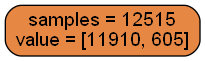

In [41]:
# Create a smaller classification tree for training partition using DecisionTreeClassifier() function control parameters:
#  - Maximum Tree depth (number of splits) = 30;
#  - Minimum impurity decrease per split = 0.01 
#  - Minimum number of sample records in a node for splitting = 20.   
smallClassTree = DecisionTreeClassifier(max_depth=30, 
        min_impurity_decrease=0.01, min_samples_split=20)
smallClassTree.fit(train_X, train_y)

# Display classification tree for training partition.
print('Small Classification Tree with Control Parameters')
plotDecisionTree(smallClassTree, feature_names=train_X.columns)

In [42]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}


gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1) #n_jobs=-1 means 
        #that the availalbe computer memory (CPU) will be used to make calculations faster. 
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

# Adapt grid based on result from initial grid search

param_grid = {
    'max_depth': list(range(2, 16)), 
    'min_samples_split': list(range(2, 16)), # decrease the minimum number of samples required to split a node
    'min_impurity_decrease': [0.0005, 0.001, 0.005, 0.01], # decrease the minimum impurity decrease required to split a node
}

gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Initial score:  0.9620455453455852
Initial parameters:  {'max_depth': 30, 'min_impurity_decrease': 0, 'min_samples_split': 20}
Improved score:  0.9615661206552136
Improved parameters:  {'max_depth': 8, 'min_impurity_decrease': 0.0005, 'min_samples_split': 2}


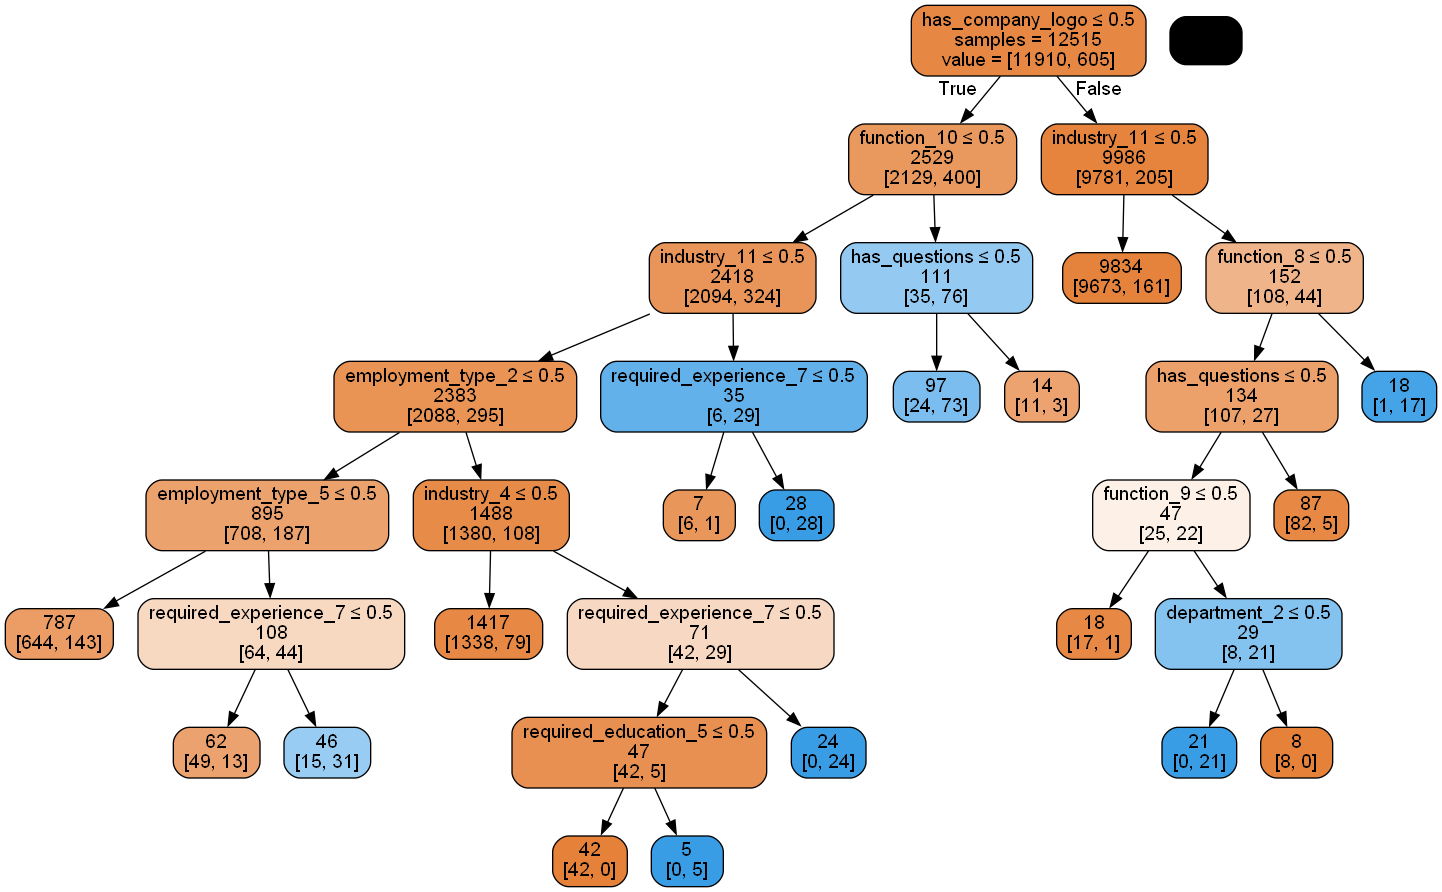

In [43]:
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

In [44]:
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9616)

       Prediction
Actual    0    1
     0 5078   26
     1  180   80


In [45]:
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

                  feature  importance       std
26  required_education_13    0.000014  0.000174
27  required_education_14    0.000047  0.000320
25  required_education_12    0.000276  0.000605
21   required_education_8    0.000618  0.001072
67              Country_2    0.000807  0.001188
..                    ...         ...       ...
37             industry_0    0.033089  0.011313
40            function_10    0.039012  0.018969
36            industry_11    0.059265  0.017078
2           has_questions    0.062033  0.027086
1        has_company_logo    0.119003  0.033412

[70 rows x 3 columns]


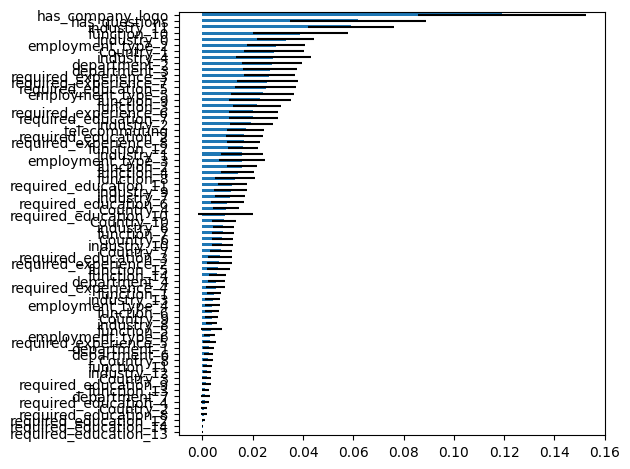

In [46]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [47]:
classificationSummary(valid_y, rf.predict(valid_X))

Confusion Matrix (Accuracy 0.9720)

       Prediction
Actual    0    1
     0 5078   26
     1  124  136


In [48]:
boost = GradientBoostingClassifier()
boost.fit(train_X, train_y)

GradientBoostingClassifier()

In [49]:
classificationSummary(valid_y, boost.predict(valid_X))

Confusion Matrix (Accuracy 0.9623)

       Prediction
Actual    0    1
     0 5089   15
     1  187   73


In [50]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
#from mord import LogisticIT #If you're looking for ordinal multi-class (more than 2 levels)
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score


#Logistic Model for Categorical variables

In [51]:

predictors = ['telecommuting', 'has_company_logo',
       'has_questions', 'employment_type', 'required_experience','required_education',
        'industry', 'function' ,'department', 'Country']
outcome = 'fraudulent'

# partition data
X = pd.get_dummies(job_df[predictors], drop_first=True)
y = job_df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=42)
# fit a logistic regression (set penalty=l2 (a penalty of L2 will force some coefficients to be small, 
#essentially focusing on a fewer variables) and C=1e42 avoids regularization, C denotes how strong we want 
#regularization to be. A smaller C will make regularization stronger ) other solvers are available, we can explore
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

# obtain the predicted probabilities for the positive class
if hasattr(logit_reg, "predict_proba"):
    y_proba = logit_reg.predict_proba(X_test)[:, 1]
else:
    y_proba = logit_reg.decision_function(X_test)
    y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())

# set the decision threshold
threshold = 0.002

#Get intercepts, coefficients, and AIC
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print() #Creates a Line space
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  0.33408159682313926
       telecommuting  has_company_logo  has_questions  employment_type_2  \
coeff       0.231308         -2.448953      -0.179905          -0.242219   

       employment_type_3  employment_type_4  employment_type_5  \
coeff           0.715606           0.214168           0.225978   

       employment_type_6  required_experience_2  required_experience_3  ...  \
coeff          -2.451261               0.913433               0.843618  ...   

       department_4  Country_7  Country_3  Country_4  Country_9  Country_8  \
coeff     -2.238798  -2.319719 -10.752371  -3.533768 -11.679816  -3.773206   

       Country_10  Country_2  Country_6  Country_1  
coeff    -1.31172  -9.815802  -2.408713  -1.696265  

[1 rows x 70 columns]

AIC -1550.3061596853458


In [52]:

logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y.values.flatten(), 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })
#valid_y.values.flatten() if one-dimensional error appears



In [53]:
logit_reg_pred = logit_reg.predict(valid_X)
classificationSummary(valid_y, logit_reg_pred)

Confusion Matrix (Accuracy 0.9573)

       Prediction
Actual    0    1
     0 5081   23
     1  206   54


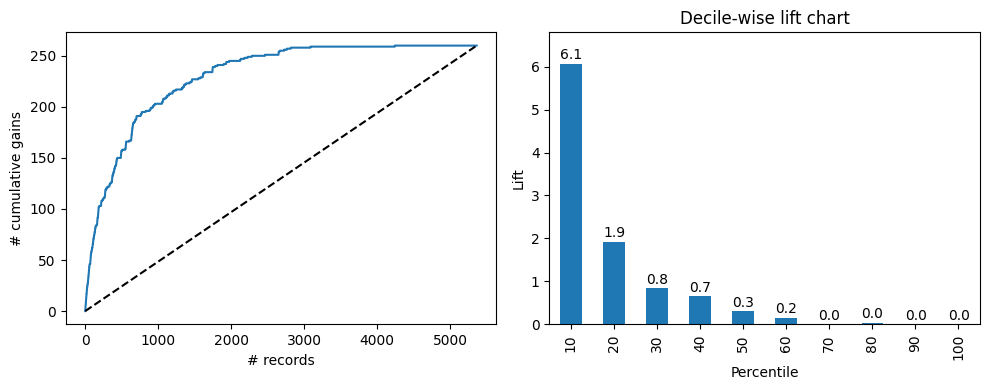

In [54]:
df3 = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df3.actual, ax=axes[0])
liftChart(df3.actual, title='Decile-wise lift chart', ax=axes[1])
    
plt.tight_layout()
plt.show()

#NLP and Text Preprocessing

In [55]:
import nltk
import re

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [56]:
trainData, validData = train_test_split(job_df, test_size=0.30, random_state=42)
print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)

Training   :  (12515, 17)
Validation :  (5364, 17)


In [57]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Define preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
   
    
    # Lemmatize text
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens back into text string
    text = ' '.join(tokens)
    
    return text


# Apply preprocessing function to selected text columns
text_cols = ['title','company_profile','description','requirements','benefits']
for col in text_cols:
    trainData[col] = trainData[col].apply(preprocess_text)

# Example usage
print(trainData[text_cols].head())


                          title  \
2412            mystery shopper   
10960                    intern   
14272  home health aideegnar co   
4122    chief operating officer   
9578             client manager   

                                         company_profile  \
2412   sdi marketing started 1988 small marketing age...   
10960  weve built revolutionary technology changing w...   
14272  critical nurse staffing inc enrolled u departm...   
4122   marketinvoice one highprofile london based fin...   
9578   founded daniel tenner paulina sygulska granttr...   

                                             description  \
2412   would like travel madison day would like get p...   
10960  via looking exceptional individual join nyc te...   
14272  critical nurse staffing inc seeking hha join t...   
4122   since launching february 2011 url_b577e004c6a3...   
9578   granttree provides financial boost uk innovati...   

                                            requirements  \
2412   

#Logistic Regression for Text Predictors

In [58]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# define a TextPreprocessor class to preprocess text data
class TextPreprocessor:
    def __init__(self):
        self.vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
        
    def fit_transform(self, X):
        X_processed = []
        for text in X:
            text = text.lower() # convert text to lowercase
            text = ' '.join(text.split()) # remove extra whitespaces
            X_processed.append(text)
        X_vectorized = self.vectorizer.fit_transform(X_processed)
        return X_vectorized
    
    def transform(self, X):
        X_processed = []
        for text in X:
            text = text.lower() # convert text to lowercase
            text = ' '.join(text.split()) # remove extra whitespaces
            X_processed.append(text)
        X_vectorized = self.vectorizer.transform(X_processed)
        return X_vectorized



# preprocess and vectorize the text columns together
text_columns = ['title',  'company_profile', 'description', 'requirements', 'benefits']
text_data = job_df[text_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
text_processor = TextPreprocessor()
text_vectorized = text_processor.fit_transform(text_data)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(text_vectorized, job_df['fraudulent'], test_size=0.3, random_state=42)

# fit a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# make predictions on the test set and evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5104
           1       1.00      0.34      0.51       260

    accuracy                           0.97      5364
   macro avg       0.98      0.67      0.75      5364
weighted avg       0.97      0.97      0.96      5364



In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_proba = clf.predict_proba(X_test)[:, 1]  # the second column represents the probability of class 1

# apply threshold to probabilities to get predicted class labels
threshold = 0.2
y_pred = np.where(y_proba > threshold, 1, 0)

# evaluate the model with the adjusted threshold
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

classificationSummary(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5104
           1       0.98      0.65      0.78       260

    accuracy                           0.98      5364
   macro avg       0.98      0.82      0.88      5364
weighted avg       0.98      0.98      0.98      5364

[[5100    4]
 [  92  168]]
Accuracy: 0.9821029082774049
Confusion Matrix (Accuracy 0.9821)

       Prediction
Actual    0    1
     0 5100    4
     1   92  168


In [60]:
logit_reg_pred = clf.predict(X_test)
logit_reg_proba = clf.predict_proba(X_test)
logit_result = pd.DataFrame({'actual': y_test.values.flatten(), 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

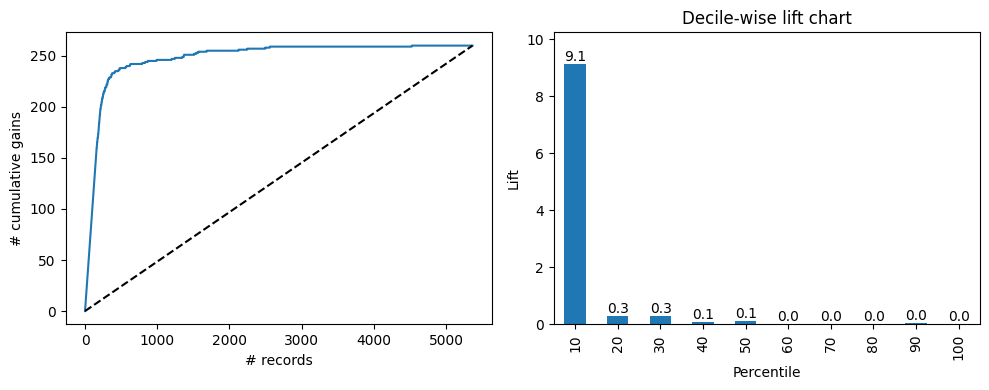

In [61]:
from dmba import classificationSummary, gainsChart, liftChart

df4 = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df4.actual, ax=axes[0])
liftChart(df4.actual, title='Decile-wise lift chart', ax=axes[1])
    
plt.tight_layout()
plt.show()

#Classification Tree with text predictors

In [63]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split



# fit a decision tree model
classTree = DecisionTreeClassifier(max_depth=30, random_state=42)
classTree.fit(X_train, y_train)

# obtain the predicted probabilities for the positive class
if hasattr(classTree, "predict_proba"):
    y_proba = classTree.predict_proba(X_test)[:, 1]
else:
    y_proba = classTree.decision_function(X_test)
    y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())

# set the decision threshold
threshold = 0.02

# make predictions on the test set using the adjusted decision threshold
y_pred = np.where(y_proba > threshold, 1, 0)

# evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy: ", accuracy_score(y_test, y_pred))
classificationSummary(y_test, y_pred)


Accuracy:  0.9815436241610739
Confusion Matrix (Accuracy 0.9815)

       Prediction
Actual    0    1
     0 5091   13
     1   86  174


#Logistic Regression for categorical + text predictors

In [64]:
trainData, validData = train_test_split(job_df, test_size=0.30, random_state=42)
print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)

Training   :  (12515, 17)
Validation :  (5364, 17)


In [67]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack, csr_matrix
from sklearn.pipeline import Pipeline


# define a TextPreprocessor class to preprocess text data
class TextPreprocessor:
    def __init__(self):
        self.vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
        
    def fit_transform(self, X):
        X_processed = []
        for text in X:
            text = text.lower() # convert text to lowercase
            text = ' '.join(text.split()) # remove extra whitespaces
            X_processed.append(text)
        X_vectorized = self.vectorizer.fit_transform(X_processed)
        return X_vectorized
    
    def transform(self, X):
        X_processed = []
        for text in X:
            text = text.lower() # convert text to lowercase
            text = ' '.join(text.split()) # remove extra whitespaces
            X_processed.append(text)
        X_vectorized = self.vectorizer.transform(X_processed)
        return X_vectorized

# preprocess and vectorize the text columns together
text_columns = ['title',  'company_profile', 'description', 'requirements', 'benefits']
text_data = trainData[text_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
text_processor = TextPreprocessor()
text_vectorized = text_processor.fit_transform(text_data)

# extract the categorical variables
cat_features = ['has_questions', 'required_experience', 'industry',  'department', 'Country']
cat_data = trainData[cat_features]

# create a pipeline to preprocess and encode the categorical data
cat_pipeline = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

# fit the pipeline on the categorical data and transform the data
cat_encoded = cat_pipeline.fit_transform(cat_data)

# concatenate the vectorized text data and encoded categorical data
X_train = hstack([text_vectorized, csr_matrix(cat_encoded)])
y_train = trainData['fraudulent']

# fit a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# make predictions on the test set and evaluate the model
text_test_data = validData[text_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
text_test_vectorized = text_processor.transform(text_test_data)

cat_test_data = validData[cat_features]
cat_test_encoded = cat_pipeline.transform(cat_test_data)

X_test = hstack([text_test_vectorized, csr_matrix(cat_test_encoded)])
y_test = validData['fraudulent']

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


C:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5104
           1       0.97      0.44      0.60       260

    accuracy                           0.97      5364
   macro avg       0.97      0.72      0.80      5364
weighted avg       0.97      0.97      0.97      5364



In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_proba = clf.predict_proba(X_test)[:, 1]  # the second column represents the probability of class 1

# apply threshold to probabilities to get predicted class labels
threshold = 0.2
y_pred = np.where(y_proba > threshold, 1, 0)

# evaluate the model with the adjusted threshold
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

classificationSummary(y_test, y_pred)





              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5104
           1       0.90      0.75      0.82       260

    accuracy                           0.98      5364
   macro avg       0.94      0.87      0.91      5364
weighted avg       0.98      0.98      0.98      5364

[[5082   22]
 [  64  196]]
Accuracy: 0.9839671886651753
Confusion Matrix (Accuracy 0.9840)

       Prediction
Actual    0    1
     0 5082   22
     1   64  196


In [69]:
logit_reg_pred = clf.predict(X_test)
logit_reg_proba = clf.predict_proba(X_test)
logit_result = pd.DataFrame({'actual': y_test.values.flatten(), 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

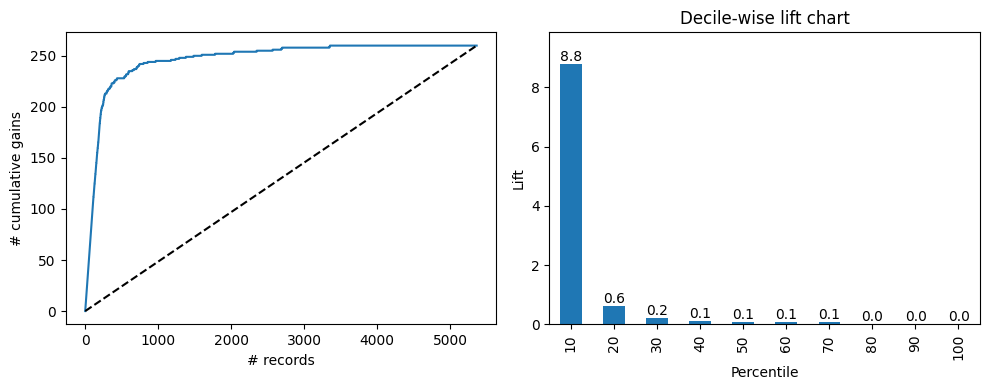

In [70]:
from dmba import classificationSummary, gainsChart, liftChart

df4 = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df4.actual, ax=axes[0])
liftChart(df4.actual, title='Decile-wise lift chart', ax=axes[1])
    
plt.tight_layout()
plt.show()

In [71]:
print("Intercept:", clf.intercept_)
print("Coefficients:", clf.coef_)


Intercept: [-4.18950768]
Coefficients: [[ 2.70038724e-01 -2.55824860e-02 -4.84871537e-04 ... -2.50056351e-01
  -1.80622493e+00  9.79123403e-01]]


In [72]:
job_df['text']=job_df['title']+' '+job_df['location']+' '+job_df['company_profile']+' '+job_df['description']+' '+job_df['requirements']+' '+job_df['benefits']

In [73]:
fraudjobs_text = job_df[job_df.fraudulent==1].text
actualjobs_text = job_df[job_df.fraudulent==0].text

In [81]:
import numpy as np 
import pandas as pd
import re
import string
import numpy as np
import pandas as pd
import random
#import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score, recall_score

import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import nltk
import random
import string
import missingno
from wordcloud import WordCloud,STOPWORDS
import numpy as np
import pandas as pd
import nltk
import random
import string

ModuleNotFoundError: No module named 'wordcloud'

In [74]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

NameError: name 'spacy' is not defined